# Model Fitting with pymc (Bayesian)

Given data, we can find the best-fit model using a range of different methods. pymc is a fully Bayesian approach to model fitting. 

We will walk through their tutorial on fitting 1D data:
<a href="https://docs.exoplanet.codes/en/v0.4.4/tutorials/intro-to-pymc3/">Fitting a Line with pymc</a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

1. Generate mock data

Text(0, 0.5, 'y')

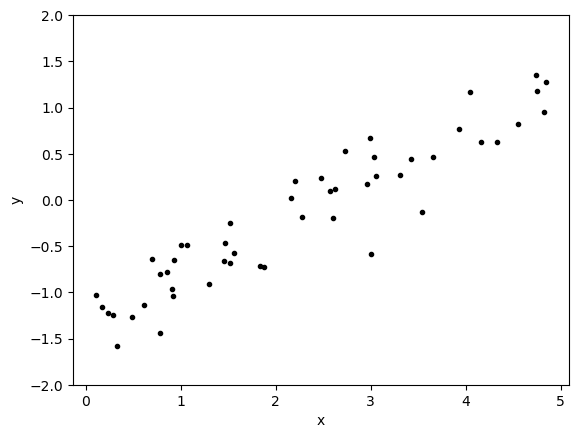

In [23]:
true_m = 0.5
true_b = -1.3
true_logs = np.log(0.3)

x = np.sort(np.random.uniform(0, 5, 50))
y = true_b + true_m * x + np.exp(true_logs) * np.random.randn(len(x))

plt.plot(x, y, ".k")
plt.ylim(-2, 2)
plt.xlabel("x")
plt.ylabel("y")

Go through the notes on the tutorial page to understand the math.

2. Construct and sample fro the model. 

In [24]:
import pymc as pm

with pm.Model() as model:

    # Define the priors on each parameter:
    m = pm.Uniform("m", lower=-5, upper=5)
    b = pm.Uniform("b", lower=-5, upper=5)
    logs = pm.Uniform("logs", lower=-5, upper=5)

    # Define the likelihood. A few comments:
    #  1. For mathematical operations like "exp", you can't use
    #     numpy. Instead, use the mathematical operations defined
    #     in "pm.math".
    #  2. To condition on data, you use the "observed" keyword
    #     argument to any distribution. In this case, we want to
    #     use the "Normal" distribution (look up the docs for
    #     this).
    # Note sigma --> sd in pymc3.
    pm.Normal("obs", mu=m * x + b, sigma=pm.math.exp(logs), observed=y)

    # This is how you will sample the model. Take a look at the
    # docs to see that other parameters that are available.
    trace = pm.sample(draws=1000, tune=1200, chains=4, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/jlu/code/mambaforge/envs/astro/lib/python3.10/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [m, b, logs]


Sampling 4 chains for 1_200 tune and 1_000 draw iterations (4_800 + 4_000 draws total) took 8 seconds.


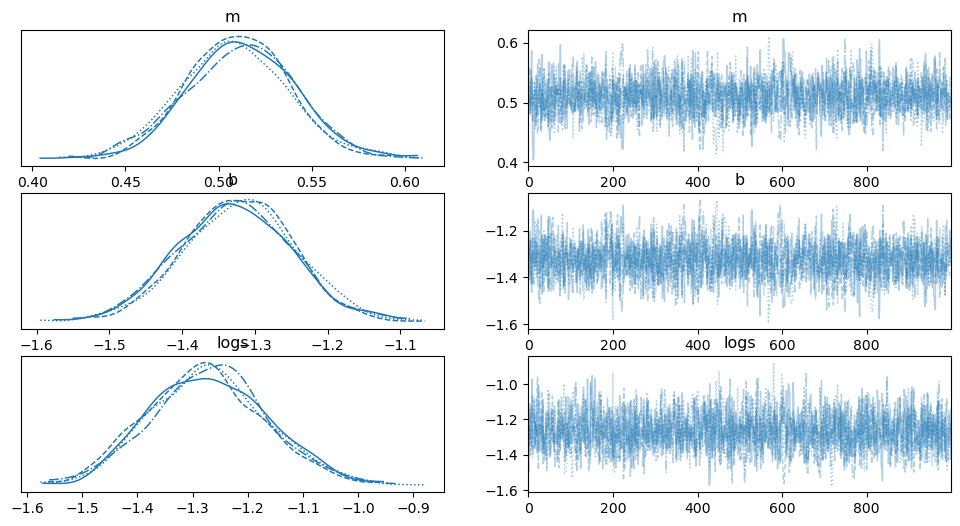

In [25]:
_ = pm.plot_trace(trace, var_names=["m", "b", "logs"])

In [26]:
pm.summary(trace, var_names=["m", "b", "logs"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m,0.511,0.029,0.454,0.565,0.001,0.001,1290.0,1538.0,1.01
b,-1.325,0.078,-1.469,-1.171,0.002,0.002,1309.0,1391.0,1.00
logs,-1.271,0.106,-1.453,-1.058,0.003,0.002,1739.0,1549.0,1.00


In [21]:
import corner  # https://corner.readthedocs.io

with model:
    samples = np.array([m.trace(),b.trace(),logs.trace()]).T
    samples = samples[0]
    _ = corner.corner(samples, truths=[true_m, true_b, true_logs])

ValueError: ('ExtractDiag needs an input with 2 or more dimensions', m)